<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Optimisez la gestion des données d'une boutique avec Python <br>
</h1>

# Scénario

Je suis data analyst freelance chez BottleNeck, un marchand de vin.

Mes missions :
 
 - rapprocher les exports ERP, WEB et le fichier de liaison
 - Obtenir le CA par pdt et CA global pour la vente en ligne 
 - Analyse et visualisation des erreurs de prix de certains pdts 
 
 
 
 

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Importation des librairies et fichiers</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

export_erp = pd.read_excel("erp.xlsx")
export_web = pd.read_excel("web.xlsx")
liaison = pd.read_excel("liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Nettoyage </h2>

Méthodologie : 
- Premier visuel : head(), shape, dtypes...
- Test unicité clé candidate : nunique()
- Recherche erreur de valeur : unique(), min(), max()...
- Modification du nom des colonnes : rename()
- Recherche et modification des doublons : duplicated(), drop_duplicates()
- Recherche et modification des valeurs manquantes : isna(), dropna()...

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- Export ERP </h3>

In [3]:
export_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
print(export_erp.shape)
print(export_erp.dtypes)

(825, 5)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


## Test unicité PK

In [5]:
export_erp["product_id"].nunique()

825

In [6]:
export_erp["product_id"].nunique()  == export_erp.shape[0]

True

## Nettoyage

In [7]:
export_erp["onsale_web"].unique()

array([1, 0], dtype=int64)

On comprend que onsale_web = 1 = vendu sur le web

In [8]:
# Sélection de tout ce qui est vendu sur le web : 717 lignes
export_erp = export_erp.loc[export_erp["onsale_web"] == 1]
export_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
787,6930,1,8.4,83,instock
792,7023,1,27.5,15,instock
793,7025,1,69.0,2,instock
822,7247,1,54.8,23,instock


In [9]:
# Doublons :
export_erp["product_id"].duplicated().sum()

0

In [10]:
# Val manquante :
export_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [11]:
# Compréhension / vérification des autres données : 
print(" Le prix maximum est de : " + str(export_erp["price"].max()))
print("Le prix minimum est de : " + str(export_erp["price"].min()))

 Le prix maximum est de : 225.0
Le prix minimum est de : 5.2


In [12]:
export_erp["stock_quantity"].unique()

array([  0,  15,  34,  12,  66,  36,  22,  46,  41,  35,  16, 112, 267,
        73,  60,  10,  27,  65,  31, 157,  98,  28,  11,  50,  54,  53,
        48,  14,  37,  45,  24,  19,  26,  43,   7,   6,  42,   5,   1,
         8,  33,  18,  17,  57, 128,  70,  58, 167, 100,  94, 276, 109,
        47, 137,  90,  99, 209,  55,  13, 105, 190,  69,  89, 195, 578,
         2,  83, 180,  20,  49,  85, 141,  25,  64, 102,  21,  56,   4,
       133,   3,  96,   9,  61,  39, 237, 114, 106,  23,  32,  93, 161,
        30, 178,  29, 151, 140,  76,  97, 163,  62, 257, 284, 168, 143,
        92,  88,  44,  95, 289,  72, 203, 129,  38,  63, 130,  51, 123,
       118, 101,  84, 132, 211, 124, 120, 363,  40], dtype=int64)

In [13]:
export_erp["stock_status"].unique()

array(['outofstock', 'instock'], dtype=object)

In [14]:
export_erp.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,717.000000,717.0,717.000000,717.000000,717
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,574
mean,5032.057183,1.0,32.736541,28.626220,NaN
std,789.025959,0.0,28.132912,47.947886,NaN
min,3847.000000,1.0,5.200000,0.000000,NaN
25%,4281.000000,1.0,14.100000,2.000000,NaN
50%,4797.000000,1.0,23.700000,12.000000,NaN
75%,5709.000000,1.0,42.600000,35.000000,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- Export WEB

In [15]:
export_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [16]:
print(export_web.shape)
export_web.dtypes

(1513, 28)


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [17]:
export_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

## Test unicité PK

In [18]:
# 714 val uniques pour notre Pk
export_web["sku"].nunique()  

714

In [19]:
# "False" : on va avoir du nettoyage à faire (714 unique contre 1513 lignes)
export_web["sku"].nunique() == export_web.shape[0]

False

## Nettoyage 

In [20]:
# Valeur 'anormale' 1 : (peux pas enlever '-1' car 13127 existe déjà et date différente), on garde
export_web.loc[export_web["sku"]== '13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [21]:
# Valeur 'anormale' 2 qui n'en est pas vraiment une (carte cadeau) : On garde
export_web.loc[export_web["sku"]== 'bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [22]:
# Vérif des doublons sur sku
export_web["sku"].duplicated().sum()

798

In [23]:
# Les doublons semblent être au niveau de post-type = product / attachment 
(export_web.groupby('sku')['post_type'].count() == 2).sum()

714

Pour les 714 sku uniques, on a bien un post-type product et attachment

In [24]:
# On va garder tout ce qui est "product" car si on supp les doublons 'first' on est pas sûr que ça soit que des products
export_web = export_web.loc[export_web["post_type"] == "product"]
export_web.shape

(716, 28)

In [25]:
# On aurait 2 ligne avec nan sku donc pas vendu sur le web (716 au lieu de 714) : 
export_web.isna().sum()

sku                        2
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                716
post_author                0
post_date                  0
post_date_gmt              0
post_content             716
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            716
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    716
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           716
comment_count              0
dtype: int64

In [26]:
#On voit qu'il y a 5 colonnes complétement vides. On peut les supp :
export_web.drop(["tax_class","post_content","post_password","post_content_filtered","post_mime_type"], axis=1, inplace=True)
export_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [27]:
# On supp les vals manquantes (car pas vendu sur le web) pour être bien à 714 lignes
export_web.dropna(inplace=True)
export_web.isna().sum()

sku                  0
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
comment_count        0
dtype: int64

In [28]:
# Vérif unicité PK après nettoyage :
export_web["sku"].nunique() == export_web.shape[0]

True

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.3 - liaison  </h3>

In [29]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [30]:
print(liaison.shape)
liaison.dtypes

(825, 2)


product_id     int64
id_web        object
dtype: object

In [31]:
liaison.rename(columns={"id_web":"sku"}, inplace=True)

## Vérif unicité PK

In [32]:
# Vérif unicité des deux K : match pas donc nettoyage 
print(liaison["sku"].nunique())
print(liaison["product_id"].nunique())
liaison["sku"].nunique() == export_web.shape[0]

734
825


False

## Nettoyage 

In [33]:
liaison.isna().sum()

product_id     0
sku           91
dtype: int64

In [34]:
# 91 val manquantes pour sku 
pdts_magasin = liaison.loc[liaison["sku"].isna(),:]
pdts_magasin

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


On sait que ces pdts ne sont pas vendus sur le web mais en magasin : sylvie nous avait informé que les pdt_id sont exhaustifs mais pas pour sku. On va les garder au cas où 

In [35]:
# On va garder les valeurs qui ont une correspondance entre pdt_id et sku
liaison.dropna(inplace=True)
liaison.isna().sum()

product_id    0
sku           0
dtype: int64

In [36]:
# Doublon
print(liaison["sku"].duplicated().sum())
print(liaison["product_id"].duplicated().sum())

0
0


In [37]:
# Vérif unicité : OK
print(liaison["sku"].nunique())
print(liaison["product_id"].nunique())

734
734


On aurait 20 pdts de plus (734 pdts) que sur notre export_web a 714 pdts. On va pouvoir voir à quoi ça ressemble lors des liaisons

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Liaison des fichiers </h2>

## Merge 1 : export_web avec liaison 

In [38]:
# Merge sur la clé "sku" : 
web = pd.merge(left= liaison, 
               right= export_web[["sku","total_sales", 'post_name']] , how="outer", on="sku", indicator=True)
web.head()

,product_id,sku,total_sales,post_name,_merge
0,3847,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,both
1,3849,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,both
2,3850,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,both
3,4032,19814,3.0,pierre-jean-villa-igp-gamine-2018,both
4,4039,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,both


In [39]:
print(web.shape)
web.info()

(734, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   product_id   734 non-null    int64   
 1   sku          734 non-null    object  
 2   total_sales  714 non-null    float64 
 3   post_name    714 non-null    object  
 4   _merge       734 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 29.5+ KB


In [40]:
# On va vérifier ce qui est différent de both car on a fait un how="outer" pour être sûr d'avoir ttes les correspondances :
articles_non_vendus = web[web["_merge"]== "left_only"]
articles_non_vendus

,product_id,sku,total_sales,post_name,_merge
185,4289,13771,NaN,NaN,left_only
227,4568,15065,NaN,NaN,left_only
230,4584,14785,NaN,NaN,left_only
334,4741,12601,NaN,NaN,left_only
368,4864,15154,NaN,NaN,left_only
371,4869,14360,NaN,NaN,left_only
399,4921,15608,NaN,NaN,left_only
400,4922,15586,NaN,NaN,left_only
443,5018,15272,NaN,NaN,left_only
445,5021,15630,NaN,NaN,left_only


In [41]:
print(len(articles_non_vendus))

20


Ici on a 20 valeurs qui correspondrait à des pdts en vente sur le web mais pas (encore) vendus ?, 
on va les enregistrer dans une variable pour les garder plus tard et si besoin lors de l'analyse

In [42]:
web[web["_merge"]== "right_only"]

,product_id,sku,total_sales,post_name,_merge


In [43]:
#On retourne à 714 lignes pour garder seulement ce qui est en commun
web = web[web["_merge"] == "both"]
web

,product_id,sku,total_sales,post_name,_merge
0,3847,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,both
1,3849,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,both
2,3850,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,both
3,4032,19814,3.0,pierre-jean-villa-igp-gamine-2018,both
4,4039,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,both
...,...,...,...,...,...
728,6930,16135,5.0,mouthes-le-bihan-aime-chai-2015,both
729,7023,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,both
730,7025,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,both
731,7247,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,both


In [44]:
web.drop(["_merge"], axis=1, inplace=True)

In [45]:
web.duplicated().sum()

0

In [46]:
web.isna().sum()

product_id     0
sku            0
total_sales    0
post_name      0
dtype: int64

## Merge final entre web et export_erp

In [47]:
#Cette fois-ci sur clé "product_id" :
erp_web = pd.merge(left= export_erp[["product_id","price","stock_quantity"]], 
               right= web, how="outer", on="product_id", indicator=True)
erp_web

,product_id,price,stock_quantity,sku,total_sales,post_name,_merge
0,3847,24.2,0,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,both
1,3849,34.3,0,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,both
2,3850,20.8,0,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,both
3,4032,14.1,0,19814,3.0,pierre-jean-villa-igp-gamine-2018,both
4,4039,46.0,0,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,both
...,...,...,...,...,...,...,...
712,6930,8.4,83,16135,5.0,mouthes-le-bihan-aime-chai-2015,both
713,7023,27.5,15,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,both
714,7025,69.0,2,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,both
715,7247,54.8,23,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,both


In [48]:
erp_web.shape

(717, 7)

In [49]:
erp_web[erp_web["_merge"] != "both"]

,product_id,price,stock_quantity,sku,total_sales,post_name,_merge
228,4594,144.0,0,NaN,NaN,NaN,left_only
449,5070,84.7,0,NaN,NaN,NaN,left_only
450,5075,43.3,0,NaN,NaN,NaN,left_only


On a pas de correspondance product_id avec sku, probablement pas vendu sur le web ou vraiment val manquante donc on va pas en tenir compte

In [50]:
erp_web = erp_web[erp_web["_merge"] == "both"]
erp_web.drop(["_merge"], axis=1, inplace=True)
erp_web.shape

C:\Users\Camil\AppData\Local\Temp\ipykernel_13812\3097295161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web.drop(["_merge"], axis=1, inplace=True)


(714, 6)

In [51]:
erp_web.duplicated().sum()

0

In [52]:
erp_web.isna().sum()

product_id        0
price             0
stock_quantity    0
sku               0
total_sales       0
post_name         0
dtype: int64

On retombe bien à 714 valeurs uniques.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 4 - Analyse univariée sur la variable "price"</h2>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.1- Distribution empirique </h3>

In [53]:
# describe() nous donne déjà des élèments (moyenne, écart-type...) on les vérifiera par la suite
erp_web["price"].describe(include="all")

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

<AxesSubplot:>

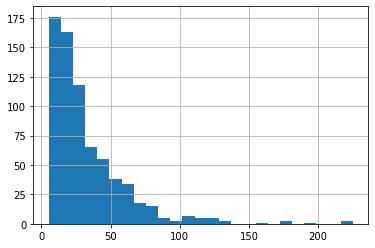

In [54]:
# Voir la distribution de la variable quantitative continue price (fréquence des val) :
erp_web[erp_web.price.abs() < 255]['price'].hist(bins=25)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.2- Tendance centrale </h3>

Vise à rendre compte de manière synthétique la valeur (ou modalité) « dominante » de la distribution 

In [55]:
#Mesure du mode : 
mode = erp_web['price'].mode()[0]
print("Le mode de la variable price est " + str(mode))

#Calcul de ma médiane :
median = erp_web['price'].median()
print("La médiane du prix est de :", str(median), "euros.")

#Calcul de la moyenne : 
mean = erp_web['price'].mean()
print("En moyenne, le prix d'une bouteille de vin est de :", int(mean), "euros.")


Le mode de la variable price est 19.0
La médiane du prix est de : 23.55 euros.
En moyenne, le prix d'une bouteille de vin est de : 32 euros.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.3- Mesures de dispersion </h3>

In [56]:
#Variance : 
var_empiri = erp_web['price'].var(ddof=0)
print("La variance est :" , round(var_empiri,2))

#Ecart-type : 
std = erp_web['price'].std(ddof=0)
print("L'écart-type est :", round(std,2))

La variance est : 772.34
L'écart-type est : 27.79


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.4- Recherche Outliers </h3>

## Boxplot

C:\Users\Camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


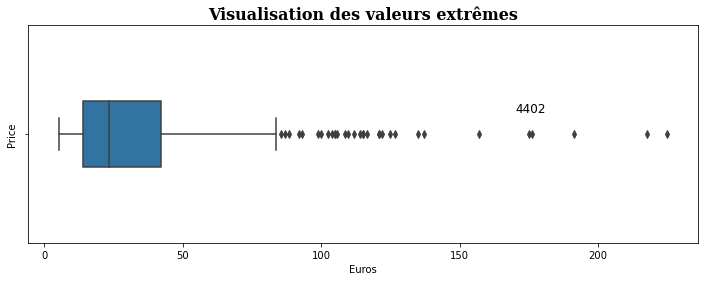

In [57]:
#On va faire un boxplot pour mieux voir les valeurs extrêmes :
x=erp_web["price"]

plt.figure(figsize =(12, 4)) 
sns.boxplot(x, width=0.3)
#sns.stripplot(x, color = 'red')
plt.title("Visualisation des valeurs extrêmes",
                     fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16});
plt.xlabel("Euros")
plt.ylabel("Price")
plt.text(170,-0.1, "4402",fontsize=12)
plt.savefig("Outliers price")

On voit qu'effectivement il y a un certain nombre de valeurs au delà du 4ème quartile.

In [58]:
# On va tenter de savoir approximativement leur nb : 
position_outliers = erp_web.loc[erp_web["price"]>80]
len(position_outliers)

34

Il y aurait approximativement 34 potentiels outliers, on va devoir vérifier : on peut utiliser la méthode interquartile ou le z-score 

## Méthode interquartile :

**IQR = Q3-Q1**

In [59]:
# On va mesurer Q1 et Q3
Q1 = np.percentile(erp_web["price"], 25)
print("Q1 = ", str(Q1))
Q2 = np.percentile(erp_web["price"], 50)
print("Q2 = ", str(Q2))
Q3 = np.percentile(erp_web["price"], 75)
print("Q3 = ", round(Q3,2))
Q4 = np.percentile(erp_web["price"], 100)
print("Q4 = ", round(Q4,2))

# Puis l'écart interquartile (IQR)
IQR = Q3-Q1
print("IQR = ", round(IQR,2))
      
# La borne inférieure et supérieure (où les valeurs en dessous/au-delà seront considérées comme outliers)
borne_inf = Q1 - 1.5 * IQR
print("Borne inf = ", round(borne_inf,2))
borne_sup = Q3 + 1.5 * IQR
print("Borne sup = ", round(borne_sup,2))

liste_outliers_inf = erp_web.loc[erp_web["price"] < borne_inf]
print("Il y a " , len(liste_outliers_inf), "outliers avant la borne inférieure")

liste_outliers_sup = erp_web.loc[erp_web["price"] > borne_sup]
print("Il y a " , len(liste_outliers_sup), "outliers après la borne supérieure")

Q1 =  14.1
Q2 =  23.55
Q3 =  42.18
Q4 =  225.0
IQR =  28.08
Borne inf =  -28.01
Borne sup =  84.29
Il y a  0 outliers avant la borne inférieure
Il y a  32 outliers après la borne supérieure


In [60]:
erp_web.loc[erp_web["price"]>84.29]

,product_id,price,stock_quantity,sku,total_sales,post_name
63,4115,100.0,11,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...
65,4132,88.4,5,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
199,4352,225.0,0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008
201,4355,126.5,2,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
205,4359,85.6,0,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...
218,4402,176.0,8,3510,13.0,cognac-frapin-vip-xo
219,4404,108.5,2,3507,2.0,cognac-frapin-fontpinot-xo
221,4406,157.0,3,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans
222,4407,104.0,6,3509,1.0,cognac-frapin-cigar-blend
227,4582,109.6,7,12857,0.0,chateau-de-puligny-montrachet-1cru-champ-canet...


## Z-score

**Z-score = (x - mean) / std**

In [61]:
erp_web["z_score"] = np.abs(sp.stats.zscore(erp_web["price"], axis=0))
erp_web

C:\Users\Camil\AppData\Local\Temp\ipykernel_13812\558690470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web["z_score"] = np.abs(sp.stats.zscore(erp_web["price"], axis=0))


,product_id,price,stock_quantity,sku,total_sales,post_name,z_score
0,3847,24.2,0,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,0.298410
1,3849,34.3,0,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.065016
2,3850,20.8,0,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.420752
3,4032,14.1,0,19814,3.0,pierre-jean-villa-igp-gamine-2018,0.661837
4,4039,46.0,0,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.486015
...,...,...,...,...,...,...,...
712,6930,8.4,83,16135,5.0,mouthes-le-bihan-aime-chai-2015,0.866939
713,7023,27.5,15,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.179667
714,7025,69.0,2,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,1.313620
715,7247,54.8,23,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.802664


Valeur z score cf colonne = le score est de .... écart-types par rapport à la moyenne

concernant les seuils : 
- un z score de 0 révèle que les valeurs sont normales
- un z score de +3 révèle que les valeurs sont bcp + élevées que la normale
- un z score de 1 correspond a 1 équart-type par rapport à la moyenne
- un z score de 2 correspond à 2 écart-type par rapport à la moyenne

In [62]:
#threshold (Seuil) 65% des D sont comprises entre -1 et 1, 95% entre -2 et 2, 99% entre -3 et 3
threshold = 2
# Seuils sup et inf du z score 1 :
seuil_sup_outliers_z = 1*std + mean
print("Z-score : seuil 1 supérieur est de : " ,round(seuil_sup_outliers_z,2))

seuil_inf_outliers_z = 1/std - mean
print("Z-score : seuil 1 inferieur est de : " ,round(seuil_inf_outliers_z,2))

print("(Z-score -1 à +1) 65% de nos données sont comprisent entre", round(seuil_inf_outliers_z,1), " et", round(seuil_sup_outliers_z,1) )

# Les seuils sup et inf du z-score seuil 2 :
seuil_sup_outliers_z = 2*std + mean
print("Z-score : seuil 2 supérieur est de : " ,round(seuil_sup_outliers_z,2))

seuil_inf_outliers_z = 2/std - mean
print("Z-score : seuil 2 inferieur est de : " ,round(seuil_inf_outliers_z,2))

print("(Z-score -2 à +2)95% de nos données sont comprisent entre", round(seuil_inf_outliers_z,2), " et", round(seuil_sup_outliers_z,2) )

# Seuils sup et inf du z score 3 :
seuil_sup_outliers_z = 3*std + mean
print("Z-score : seuil 3 supérieur est de : " ,round(seuil_sup_outliers_z,2))

seuil_inf_outliers_z = 3/std - mean
print("Z-score : seuil 3 inferieur est de : " ,round(seuil_inf_outliers_z,2))

print("(Z-score -3 à +3)99% de nos données sont comprisent entre", round(seuil_inf_outliers_z,3), " et", round(seuil_sup_outliers_z,3) )

# Nombre d'outliers :
outliers_z = erp_web.loc[erp_web["z_score"] > 2]
print("Il y aurait", len(outliers_z), "potentiels outliers d'après le z-score")

Z-score : seuil 1 supérieur est de :  60.28
Z-score : seuil 1 inferieur est de :  -32.46
(Z-score -1 à +1) 65% de nos données sont comprisent entre -32.5  et 60.3
Z-score : seuil 2 supérieur est de :  88.08
Z-score : seuil 2 inferieur est de :  -32.42
(Z-score -2 à +2)95% de nos données sont comprisent entre -32.42  et 88.08
Z-score : seuil 3 supérieur est de :  115.87
Z-score : seuil 3 inferieur est de :  -32.39
(Z-score -3 à +3)99% de nos données sont comprisent entre -32.385  et 115.866
Il y aurait 30 potentiels outliers d'après le z-score


In [63]:
# Comptage et liste à montrer pour vérification : 
liste_outliers_z = erp_web.loc[erp_web["price"] > 88.08]
print(len(liste_outliers_z))
liste_outliers_z

30


,product_id,price,stock_quantity,sku,total_sales,post_name,z_score
63,4115,100.0,11,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2.429087
65,4132,88.4,5,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2.011686
199,4352,225.0,0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,6.926939
201,4355,126.5,2,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,3.382632
218,4402,176.0,8,3510,13.0,cognac-frapin-vip-xo,5.163781
219,4404,108.5,2,3507,2.0,cognac-frapin-fontpinot-xo,2.734941
221,4406,157.0,3,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,4.480108
222,4407,104.0,6,3509,1.0,cognac-frapin-cigar-blend,2.573018
227,4582,109.6,7,12857,0.0,chateau-de-puligny-montrachet-1cru-champ-canet...,2.774522
381,4903,102.3,20,14805,0.0,domaine-des-croix-corton-grand-cru-les-greves-...,2.511848


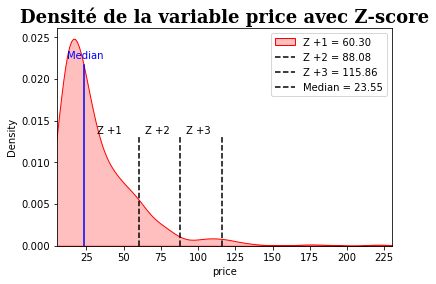

In [64]:
sns.kdeplot(erp_web['price'], shade = True , color = "red")

plt.title("Densité de la variable price avec Z-score",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})

plt.axvline(x=60.3, ymin=0, ymax=0.50, color="black", ls="--")
plt.axvline(x=88.08, ymin=0, ymax=0.50, color="black",ls="--")
plt.axvline(x=115.86, ymin=0, ymax=0.50, color="black",ls="--")
plt.axvline(x=23.55, ymin=0, ymax=0.83, color="blue")

plt.text(12, 0.0225, "Median", color="blue")
plt.text(32, 0.0135, "Z +1")
plt.text(64, 0.0135, "Z +2")
plt.text(92, 0.0135, "Z +3")

plt.xlim(5.2, 230)

plt.legend(labels=["Z +1 = 60.30", "Z +2 = 88.08", "Z +3 = 115.86", "Median = 23.55"])

plt.show()

## Scatter plot sur price et total_sales

Text(93, 56, '4334')

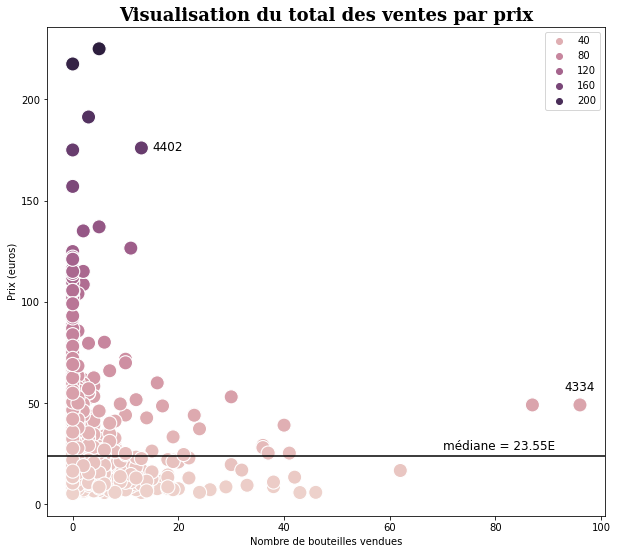

In [65]:
# On va voir aussi avec un scatter plot pour le prix et les ventes:

plt.figure(figsize =(10, 9))
sns.scatterplot(data = erp_web, x ="total_sales", y= "price", hue='price',  s=200)
plt.title("Visualisation du total des ventes par prix",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel("Nombre de bouteilles vendues")
plt.ylabel("Prix (euros)")
plt.legend(loc='upper right')
plt.axhline(y=np.median(erp_web["price"]),color="k")
plt.text(70,27,"médiane = 23.55E",fontsize=12)
plt.text(15,175, "4402",fontsize=12)
plt.text(93,56, "4334",fontsize=12)

On retrouve nos potentiels outliers sur la variable prix mais on constate également qu'il pourrait y avoir 3 outliers sur la variable total_sales

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 5 - Observations </h2>

In [66]:
# On va créer une nouvelle colonne permettant de calculer le CA par produit
erp_web["ca_pdt"] = erp_web["total_sales"] * erp_web["price"]
erp_web.loc[erp_web["ca_pdt"] != 0].head(10)

C:\Users\Camil\AppData\Local\Temp\ipykernel_13812\2735315947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web["ca_pdt"] = erp_web["total_sales"] * erp_web["price"]


,product_id,price,stock_quantity,sku,total_sales,post_name,z_score,ca_pdt
0,3847,24.2,0,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,0.298410,145.2
3,4032,14.1,0,19814,3.0,pierre-jean-villa-igp-gamine-2018,0.661837,42.3
7,4042,31.2,34,16042,7.0,pierre-gaillard-cornas-2017,0.046531,218.4
8,4043,60.0,12,14980,3.0,pierre-gaillard-cote-rotie-esprit-blond-2017,0.989774,180.0
9,4045,42.6,66,16041,14.0,pierre-gaillard-cote-rotie-2018,0.363673,596.4
10,4046,80.0,0,15269,6.0,pierre-gaillard-cote-rotie-rose-pourpre-2017,1.709431,480.0
12,4048,22.8,22,16044,7.0,pierre-gaillard-saint-joseph-cuminaille-2018,0.348786,159.6
13,4049,19.3,46,16043,1.0,pierre-gaillard-saint-joseph-2018,0.474726,19.3
14,4050,21.8,0,16449,6.0,pierre-gaillard-saint-joseph-blanc-2019,0.384769,130.8
15,4051,7.7,41,16045,6.0,pierre-gaillard-syrah-terre-mandrin-2018,0.892127,46.2


In [67]:
# On va ensuite voir le CA global 
ca_global = erp_web["ca_pdt"].sum()
print("Le CA global de la vente de vin sur le web est de : " + str(ca_global) + " euros.")

Le CA global de la vente de vin sur le web est de : 70568.6 euros.


In [68]:
# Liste de toutes les bouteilles de vins qui ont été vendues :
ca_par_vins_vendus = erp_web.groupby(["product_id", "sku",'post_name' ]).sum().sort_values(by="ca_pdt", ascending=False)
ca_par_vins_vendus = ca_par_vins_vendus.loc[ca_par_vins_vendus["ca_pdt"] > 0]
ca_par_vins_vendus

,,,price,stock_quantity,total_sales,z_score,ca_pdt
product_id,sku,post_name,,,,,
4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,0,96.0,0.593963,4704.0
4144,1662,champagne-gosset-grand-rose,49.0,11,87.0,0.593963,4263.0
4402,3510,cognac-frapin-vip-xo,176.0,8,13.0,5.163781,2288.0
4142,11641,champagne-gosset-grand-millesime-2006,53.0,8,30.0,0.737895,1590.0
4141,304,gosset-champagne-grande-reserve,39.0,1,40.0,0.234135,1560.0
...,...,...,...,...,...,...,...
4241,14725,parce-freres-hommage-fernand-blanc-2019,8.9,7,1.0,0.848948,8.9
4245,16097,parce-freres-igp-pays-oc-zoe-viognier-2019,8.9,141,1.0,0.848948,8.9
4171,14332,ollieux-romanis-monsieur-pinot-2017,7.8,65,1.0,0.888529,7.8


On a vendu au total 385 bouteilles de vin différentes sur 714 disponibles

In [69]:
pourc_vente_vin = (385 * 100) / 714
print("La vente sur le web représente " + "{:.2f}".format(round(pourc_vente_vin,2)) + " % de la totalité des produits web disponibles.")

La vente sur le web représente 53.92 % de la totalité des produits web disponibles.


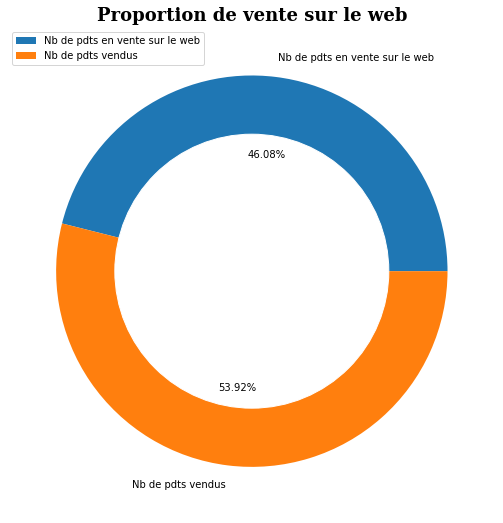

In [70]:
pourcentage_vente = [714-385, 385]

plt.figure(figsize=(9,9))
plt.pie(pourcentage_vente, labels=["Nb de pdts en vente sur le web","Nb de pdts vendus"],
         normalize = True,
       autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion de vente sur le web",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.legend(loc='upper left')

In [71]:
# On veut voir le pourcentage du CA par bouteilles de vins vendues
ca_par_vins_vendus["pourcentage_ca"] = (ca_par_vins_vendus["ca_pdt"]*100)/ca_global
ca_par_vins_vendus.head()

,,,price,stock_quantity,total_sales,z_score,ca_pdt,pourcentage_ca
product_id,sku,post_name,,,,,,
4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,0,96.0,0.593963,4704.0,6.665854
4144,1662,champagne-gosset-grand-rose,49.0,11,87.0,0.593963,4263.0,6.040930
4402,3510,cognac-frapin-vip-xo,176.0,8,13.0,5.163781,2288.0,3.242235
4142,11641,champagne-gosset-grand-millesime-2006,53.0,8,30.0,0.737895,1590.0,2.253127
4141,304,gosset-champagne-grande-reserve,39.0,1,40.0,0.234135,1560.0,2.210615


In [72]:
# Le top 3 des vins qui ont rapporté le plus de ca
top3_ca = ca_par_vins_vendus.sort_values(by="pourcentage_ca", ascending=False).head(3)
top3_ca

,,,price,stock_quantity,total_sales,z_score,ca_pdt,pourcentage_ca
product_id,sku,post_name,,,,,,
4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,0,96.0,0.593963,4704.0,6.665854
4144,1662,champagne-gosset-grand-rose,49.0,11,87.0,0.593963,4263.0,6.040930
4402,3510,cognac-frapin-vip-xo,176.0,8,13.0,5.163781,2288.0,3.242235


Text(2, 1568.0, '2288')

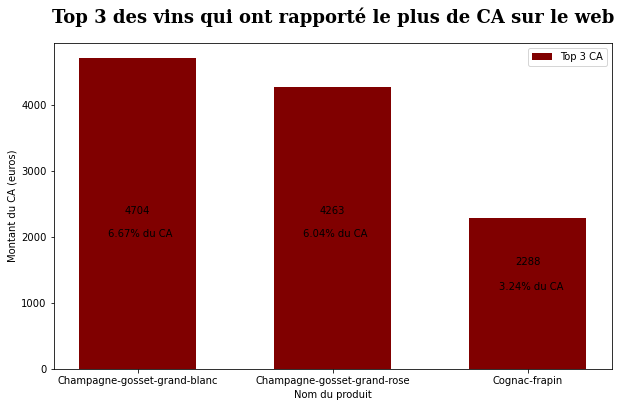

In [73]:
height = [4704,4263,2288]
bars = "Champagne-gosset-grand-blanc", "Champagne-gosset-grand-rose", "Cognac-frapin"


plt.figure(figsize=(10,6))
plt.bar(bars, height, color="maroon", width= 0.6, label='Top 3 CA')
plt.title("Top 3 des vins qui ont rapporté le plus de CA sur le web", pad=(20),
          fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18}
         )
plt.ylabel("Montant du CA (euros)")
plt.xlabel("Nom du produit")
plt.text(-0.15, 2000, "6.67% du CA")
plt.text(0.85, 1990, "6.04% du CA")
plt.text(1.85, 1200, "3.24% du CA")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(height[0], (0,height[0]/2), ha="center")
plt.annotate(height[1], (1,height[0]/2), ha="center")
plt.annotate(height[2], (2,height[0]/3), ha="center")

In [74]:
# Le top 3 des vins les plus prestigieux
top3_price = ca_par_vins_vendus.sort_values(by="price", ascending=False).head(3)
top3_price

,,,price,stock_quantity,total_sales,z_score,ca_pdt,pourcentage_ca
product_id,sku,post_name,,,,,,
4352,15940,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,0,5.0,6.926939,1125.0,1.594193
5892,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-2016,191.3,10,3.0,5.714318,573.9,0.813251
4402,3510,cognac-frapin-vip-xo,176.0,8,13.0,5.163781,2288.0,3.242235


Text(2, 112.5, '176.0')

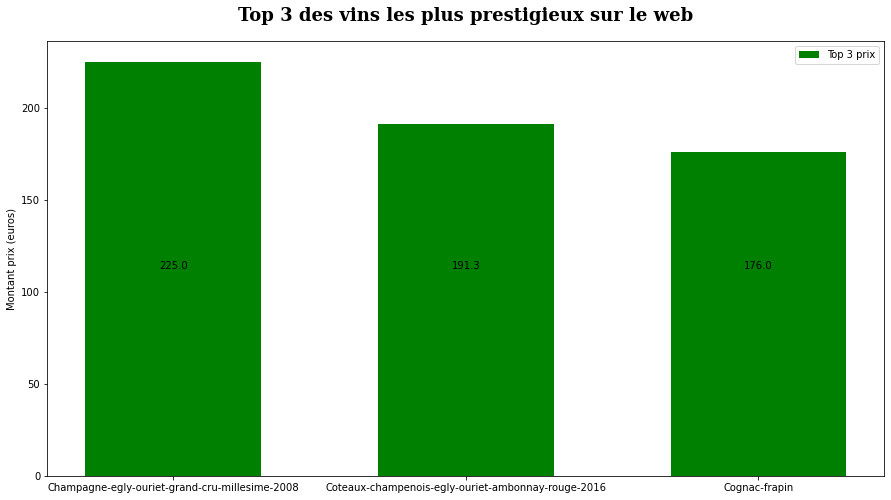

In [75]:
height = [225.0,191.3,176.0]
bars = "Champagne-egly-ouriet-grand-cru-millesime-2008", "Coteaux-champenois-egly-ouriet-ambonnay-rouge-2016", "Cognac-frapin"


plt.figure(figsize=(15,8))
plt.bar(bars, height, color="green", width= 0.6, label='Top 3 prix')
plt.title("Top 3 des vins les plus prestigieux sur le web", pad=(20),
          fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18}
         )
plt.ylabel("Montant prix (euros)")
#plt.xlabel("Identifiant du produit")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(height[0], (0,height[0]/2), ha="center")
plt.annotate(height[1], (1,height[0]/2), ha="center")
plt.annotate(height[2], (2,height[0]/2), ha="center")

In [76]:
#Le top 3 des vins qui ont été le plus vendus
top3_vente = ca_par_vins_vendus.sort_values(by="total_sales", ascending=False).head(3)
top3_vente

,,,price,stock_quantity,total_sales,z_score,ca_pdt,pourcentage_ca
product_id,sku,post_name,,,,,,
4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,0,96.0,0.593963,4704.0,6.665854
4144,1662,champagne-gosset-grand-rose,49.0,11,87.0,0.593963,4263.0,6.040930
4068,16416,gilles-robin-crozes-hermitage-papillon-2019,16.6,157,62.0,0.571880,1029.2,1.458439


Text(2, 32.0, '62')

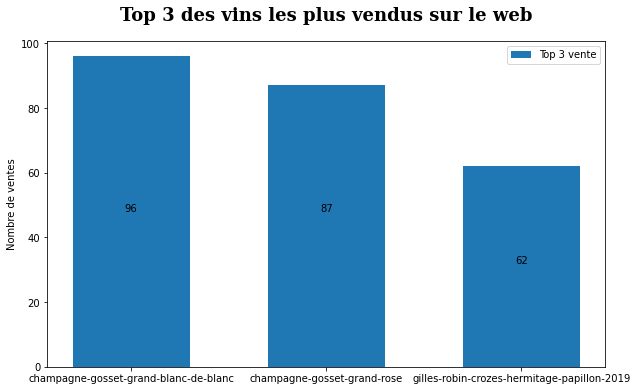

In [77]:
height = [96,87,62]
bars = "champagne-gosset-grand-blanc-de-blanc", "champagne-gosset-grand-rose", "gilles-robin-crozes-hermitage-papillon-2019"


plt.figure(figsize=(10,6))
plt.bar(bars, height, width= 0.6, label='Top 3 vente')
plt.title("Top 3 des vins les plus vendus sur le web", pad=(20),
          fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18}
         )
plt.ylabel("Nombre de ventes")
#plt.xlabel("Identifiant du produit")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(height[0], (0,height[0]/2), ha="center")
plt.annotate(height[1], (1,height[0]/2), ha="center")
plt.annotate(height[2], (2,height[0]/3), ha="center")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 6 - Conclusion </h2>

Les outliers peuvent être partiellement / totalement supprimés, modifiés ou gardés.

D’abord, se poser les bonnes questions : 

- De quoi s’agit-il ? 
- Comment nos valeurs ont-elles étaient indexées ? (Erreur de saisie ?)
- Plutôt atypique ou aberrante ? 

D’après notre liste des potentiels 30 outliers pour la variable prix (>88,08E) :

- Prix de bouteille de vin : selon cépage, appellation,  année, lieu de pd, type = prix +++
- Faire vérifier l’authenticité des prix par les équipes concernées
- Plutôt atypiques 
- Décision de les garder
    
Si nous devions supprimer/modifier les outliers : 

- Une baisse significative du CA
- Modification des top 3 
- Observations/analyses en général 
    
Recherche informations sur nos deux listes : pdts_magasin & article_non_vendus  :

Intéressant d’en apprendre un peu plus et de voir à quoi correspondent ces articles :

- Pas encore en vente sur le web ? 
- Retirés du web récemment ?
- Valeurs manquantes à rechercher ? 

Possibilité de faire du Webscraping pour vérif les potentiels outliers par rapport à la concurrence ou autre